# <font color="1665BF">Prédire les retards de vols en créant un modèle Machine Learning en Python</font>

Le DataFrame contient des informations sur les arrivées à l’heure d’une importante compagnie aérienne américaine. Il contient plus de 11 000 lignes et a 26 colonnes. Chaque ligne représente un vol et contient des informations comme l’origine, la destination, l’heure de départ planifiée, et si le vol est arrivé à temps ou en retard. Nous allons examiner les données plus en détail un peu plus loin dans ce module. 

In [1]:
! curl https://topcs.blob.core.windows.net/public/FlightData.csv --output flightdata.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 14 1552k   14  223k    0     0   121k      0  0:00:12  0:00:01  0:00:11  121k
 39 1552k   39  607k    0     0   221k      0  0:00:07  0:00:02  0:00:05  221k
 62 1552k   62  975k    0     0   265k      0  0:00:05  0:00:03  0:00:02  265k
 85 1552k   85 1327k    0     0   280k      0  0:00:05  0:00:04  0:00:01  280k
100 1552k  100 1552k    0     0   295k      0  0:00:05  0:00:05 --:--:--  343k


## <font color="D56E19">Chargement du jeu de données</font>

In [25]:
import pandas as pd

df = pd.read_csv('flightdata.csv')
df.drop(['Unnamed: 0', 'Unnamed: 25'], axis=1, inplace=True)
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,0.0,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,0.0,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,0.0,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,0.0,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,0.0,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0


In [ ]:
# Exporter le jeu données
#df.to_csv(r'C:\Users\lahat\Documents\M2IMSD\Machine Learning\Predict_flight_delays_ML\flightdata.csv')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 25 columns):
YEAR                   11231 non-null int64
QUARTER                11231 non-null int64
MONTH                  11231 non-null int64
DAY_OF_MONTH           11231 non-null int64
DAY_OF_WEEK            11231 non-null int64
UNIQUE_CARRIER         11231 non-null object
TAIL_NUM               11231 non-null object
FL_NUM                 11231 non-null int64
ORIGIN_AIRPORT_ID      11231 non-null int64
ORIGIN                 11231 non-null object
DEST_AIRPORT_ID        11231 non-null int64
DEST                   11231 non-null object
CRS_DEP_TIME           11231 non-null int64
DEP_TIME               11124 non-null float64
DEP_DELAY              11124 non-null float64
DEP_DEL15              11124 non-null float64
CRS_ARR_TIME           11231 non-null int64
ARR_TIME               11116 non-null float64
ARR_DELAY              11043 non-null float64
ARR_DEL15              11043 non-null flo

## <font color="D56E19">Nettoyer et préparer les données</font>

#### Valeurs manquantes

In [31]:
df.isnull().values.any()

True

In [36]:
df.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [37]:
df = df[["MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "ORIGIN", "DEST", "CRS_DEP_TIME", "ARR_DEL15"]]
df.isnull().sum()

MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_DEP_TIME      0
ARR_DEL15       188
dtype: int64

In [39]:
# Afficher les cinq premières lignes avec des valeurs manquantes 
df[df.isnull().values.any(axis=1)].head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
177,1,9,6,MSP,SEA,701,NaN
179,1,10,7,MSP,DTW,1348,NaN
184,1,10,7,MSP,DTW,625,NaN
210,1,10,7,DTW,MSP,1200,NaN
478,1,22,5,SEA,JFK,2305,NaN


La raison pour laquelle des valeurs sont manquantes dans ARR_DEL15 pour ces lignes est que celles-ci correspondent toutes à des vols qui ont été annulés ou déroutés. Vous pouvez appeler dropna sur le DataFrame pour supprimer ces lignes. Mais dans la mesure où un vol annulé ou dérouté vers un autre aéroport peut être considéré comme étant « en retard », utilisons la méthode fillna pour remplacer les valeurs manquantes par des 1.

Utilisez le code suivant pour remplacer les valeurs manquantes de la colonne ARR_DEL15 par des 1 et pour afficher les lignes 177 à 184 :

In [40]:
df = df.fillna({'ARR_DEL15': 1})
df.iloc[177:185]

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
177,1,9,6,MSP,SEA,701,1.0
178,1,9,6,DTW,JFK,1527,0.0
179,1,10,7,MSP,DTW,1348,1.0
180,1,10,7,DTW,MSP,1540,0.0
181,1,10,7,JFK,ATL,1325,0.0
182,1,10,7,JFK,ATL,610,0.0
183,1,10,7,JFK,SEA,1615,0.0
184,1,10,7,MSP,DTW,625,1.0


In [42]:
df.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ARR_DEL15
count,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000
mean,6.628973,15.790758,3.960199,1320.798326,0.139168
std,3.354678,8.782056,1.995257,490.737845,0.346138
min,1.000000,1.000000,1.000000,10.000000,0.000000
25%,4.000000,8.000000,2.000000,905.000000,0.000000
50%,7.000000,16.000000,4.000000,1320.000000,0.000000
75%,9.000000,23.000000,6.000000,1735.000000,0.000000
max,12.000000,31.000000,7.000000,2359.000000,1.000000


La colonne CRS_DEP_TIME du jeu de données que vous utilisez représente les heures de départ planifiées. La granularité des nombres dans cette colonne peut avoir un impact négatif sur la précision dans un modèle Machine Learning : elle contient en effet plus de 500 valeurs uniques. Ceci peut être résolu à l’aide d’une technique appelée compartimentage ou quantification. Que se passe-t-il si vous divisez chaque nombre figurant dans cette colonne par 100, en arrondissant le résultat à l’entier le plus proche ? 1030 deviendrait 10, 1925 deviendrait 19 et ainsi de suite, et vous auriez alors un maximum de 24 valeurs discrètes dans cette colonne. Intuitivement, ceci a du sens, car cela importe probablement peu qu’un vol parte à 10 h 30 ou à 10 h 40. Cela importe par contre beaucoup s’il part à 10 h 30 ou à 17 h 30.

In [ ]:
import math

for index, row in df.iterrows():
    df.loc[index, 'CRS_DEP_TIME'] = math.floor(row['CRS_DEP_TIME'] / 100)
df.head()

"Compartimenter" la colonne CRS_DEP_TIME et utiliser la méthode get_dummies de Pandas pour créer des colonnes d’indicateurs à partir des colonnes ORIGIN et DEST

In [51]:
df = pd.get_dummies(df, columns=['ORIGIN', 'DEST'])
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ARR_DEL15,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
0,1,1,5,19,0.0,1,0,0,0,0,0,0,0,0,1
1,1,1,5,13,0.0,0,1,0,0,0,0,0,0,1,0
2,1,1,5,9,0.0,1,0,0,0,0,0,0,0,0,1
3,1,1,5,8,0.0,0,0,0,0,1,0,0,0,1,0
4,1,1,5,23,0.0,0,0,0,0,1,0,1,0,0,0


## <font color="D56E19">Créer un modèle Machine Learning</font>

Pour créer un modèle Machine Learning, vous avez besoin de deux jeux de données : 
un pour l’entraînement et un pour les tests. 

Dans la pratique, vous n’avez souvent qu’un seul jeu de données : vous le divisez donc en deux. Dans cet exercice, vous allez effectuer un fractionnement 80-20 sur le DataFrame que vous avez préparé dans le labo précédent, afin de pouvoir l’utiliser pour entraîner un modèle Machine Learning. Vous allez aussi séparer le DataFrame en colonnes de caractéristiques et en colonnes d’étiquettes. Le premier contient les colonnes utilisées comme entrée pour le modèle (par exemple l’origine et la destination du vol, et l’heure de départ planifiée), tandis que le deuxième contient la colonne que le modèle va essayer de prédire : dans ce cas, la colonne ARR_DEL15, qui indique si un vol arrivera à l’heure. 

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('ARR_DEL15', axis=1), df['ARR_DEL15'], test_size=0.2,
                                                    random_state=42)

train_test_split retourne quatre DataFrames.

In [65]:
print(f'Nombre de lignes et de colonnes de X_train : {X_train.shape}')
print(f'Nombre de lignes et de colonnes de X_test : {X_test.shape}')

Nombre de lignes et de colonnes de X_train : (8984, 14)
Nombre de lignes et de colonnes de X_test : (2247, 14)


###### Le modèle sera un modèle de classification binaire qui prédit si un vol arrivera à l’heure ou en retard (« binaire », car il n’y a que deux résultats possibles).

Nous utiliserons le RandomForestClassifier, qui ajuste plusieurs arbres de décision aux données, et utilise la moyenne pour améliorer la précision globale et limiter le surajustement.

In [72]:
# création un objet RandomForestClassifier et entraînez-le en appelant la méthode fit.
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=13)
model.fit(X_train, y_train)

C:\Users\lahat\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

La sortie montre les paramètres utilisés dans le classifieur, notamment n_estimators, qui spécifie le nombre d’arbres dans chaque forêt d’arbres de décision, et max_depth, qui spécifie la profondeur maximale des arbres de décision. Les valeurs affichées sont les valeurs par défaut, mais vous pouvez les remplacer lors de la création de l’objet RandomForestClassifier.

Appelez maintenant la méthode predict pour tester le modèle en utilisant les valeurs dans test_x, suivie de la méthode score pour déterminer la précision moyenne du modèle :

In [73]:
predicted = model.predict(X_test)
model.score(X_test, y_test)

0.8602581219403649

La précision moyenne est de 86 %, ce qui semble bon au premier abord. Cependant, la précision moyenne n’est pas toujours un indicateur fiable de la précision d’un modèle de classification. Approfondissons l’analyse et déterminons la précision réelle du modèle, c’est-à-dire son expertise pour déterminer si un vol arrivera à l’heure.

###### AUC

Il existe plusieurs façons de mesurer la précision d’un modèle de classification. Une des meilleures mesures globales pour un modèle de classification binaire est l’Aire sous la courbe de la fonction d’efficacité du récepteur (parfois appelée « Aire sous la courbe ROC »), qui quantifie essentiellement la fréquence à laquelle le modèle fait une prédiction correcte indépendamment du résultat.

Avant de calculer l’aire sous la courbe ROC, vous devez générer des probabilités de prédiction pour le jeu de test. Ces probabilités sont des estimations pour chacune des classes, ou réponses, que le modèle peut prédire. Par exemple, [0.88199435, 0.11800565] signifie qu’il y a 89 % de chances qu’un vol arrive à l’heure (ARR_DEL15 = 0) et 12 % de chances que ce ne soit pas le cas (ARR_DEL15 = 1). La somme des deux probabilités fait 100 %.

In [77]:
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(X_test)
roc_auc_score(y_test, probabilities[:, 1])

0.6743824904998539

###### Pourquoi le score d’aire sous la courbe est-il inférieur à la précision moyenne calculée dans l’exercice précédent ?

La sortie de la méthode score reflète le nombre des éléments du jeu de test que le modèle a prédit correctement. Ce score est biaisé par le fait que le jeu de données avec lequel le modèle a été entraîné et testé contient beaucoup plus de lignes représentant des arrivées à l’heure que des lignes représentant des arrivées avec retard. En raison de ce déséquilibre dans les données, vous êtes plus susceptible d’être correct si vous prédisez qu’un vol sera à l’heure que si vous prédisez qu’un vol sera en retard.

L’aire sous la courbe ROC prend ceci en compte et fournit une indication plus précise de la probabilité qu’une prédiction de vol à l’heure ou avec retard soit correcte.

###### Matrice de confusion 

Vous pouvez en savoir plus sur le comportement du modèle en générant une matrice de confusion, également appelée matrice d’erreur. La matrice de confusion quantifie le nombre de fois où chaque réponse a été classifiée correctement ou incorrectement. Plus précisément, elle évalue le nombre de faux positifs, de faux négatifs, de vrais positifs et de vrais négatifs. Ceci est important, car si un modèle de classification binaire entraîné à reconnaître des chats et des chiens a été testé avec un jeu de données constitué à 95 % de chiens, son score peut être de 95 % simplement en devinant « chien » à chaque fois. Mais s’il a toujours échoué à identifier des chats, sa valeur serait très faible.

In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted)

array([[1882,   54],
       [ 260,   51]], dtype=int64)

Regardez cependant la deuxième ligne, qui représente les vols qui ont été en retard. La première colonne montre combien de vols en retard ont été prédits incorrectement comme étant à l’heure. La deuxième colonne montre combien de vols ont été prédits correctement comme étant en retard. Clairement, le modèle n’est pas aussi expert pour prédire qu’un vol sera en retard que pour prédire qu’un vol arrivera à l’heure. Ce que vous voulez dans une matrice de confusion, ce sont des nombres élevés dans les coins supérieur gauche et inférieur droit, et des nombres peu élevés (de préférence des zéros) dans les coins supérieur droit et inférieur gauche.

###### Precision 

scikit-learn contient une méthode pratique nommée precision_score pour le calcul de la précision

In [80]:
from sklearn.metrics import precision_score

train_predictions = model.predict(X_train)
precision_score(y_train, train_predictions)

0.9972375690607734

###### Rappel

scikit-learn contient également une méthode nommée recall_score pour le calcul du rappel

In [81]:
from sklearn.metrics import recall_score

recall_score(y_train, train_predictions)

0.8650159744408946

## <font color="D56E19">Amélioration ou utilisation d'autres modèles de Machine Learning</font>

Nous pouvons rechercher des moyens de rendre le modèle encore plus précis. 
Entre autres choses, nous pouvons aussi essayer différents algorithmes et prendre des mesures pour optimiser l’algorithme choisi de façon à trouver la combinaison optimale des paramètres. Une autre étape probable serait d’étendre le jeu de données à des millions de lignes au lieu de quelques milliers, et aussi d’essayer de réduire le déséquilibre entre les arrivées en retard et les arrivées à l’heure. Mais dans notre contexte, le modèle est bon en l’état. 

## <font color="D56E19">Visualiser la sortie du modèle</font>

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

###### Courbe de ROC

Text(0, 0.5, 'True Positive Rate')

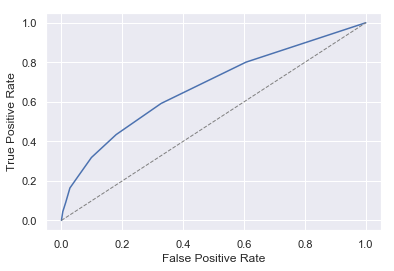

In [100]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, probabilities[:, 1])
#fig = plt.figure(figsize=(12, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

La raison pour laquelle vous avez créé un modèle Machine Learning est de prédire si un vol arrivera à l’heure ou en retard. Dans cet exercice, vous allez écrire une fonction Python qui appelle le modèle Machine Learning que vous avez créé précédemment pour calculer la probabilité qu’un vol sera à l’heure. Ensuite, vous utiliserez la fonction pour analyser plusieurs vols.

In [101]:
def predict_delay(departure_date_time, origin, destination):
    
    from datetime import datetime

    try:
        departure_date_time_parsed = datetime.strptime(departure_date_time, '%d/%m/%Y %H:%M:%S')
    except ValueError as e:
        return 'Error parsing date/time - {}'.format(e)

    month = departure_date_time_parsed.month
    day = departure_date_time_parsed.day
    day_of_week = departure_date_time_parsed.isoweekday()
    hour = departure_date_time_parsed.hour

    origin = origin.upper()
    destination = destination.upper()

    input = [{'MONTH': month,
              'DAY': day,
              'DAY_OF_WEEK': day_of_week,
              'CRS_DEP_TIME': hour,
              'ORIGIN_ATL': 1 if origin == 'ATL' else 0,
              'ORIGIN_DTW': 1 if origin == 'DTW' else 0,
              'ORIGIN_JFK': 1 if origin == 'JFK' else 0,
              'ORIGIN_MSP': 1 if origin == 'MSP' else 0,
              'ORIGIN_SEA': 1 if origin == 'SEA' else 0,
              'DEST_ATL': 1 if destination == 'ATL' else 0,
              'DEST_DTW': 1 if destination == 'DTW' else 0,
              'DEST_JFK': 1 if destination == 'JFK' else 0,
              'DEST_MSP': 1 if destination == 'MSP' else 0,
              'DEST_SEA': 1 if destination == 'SEA' else 0 }]

    return model.predict_proba(pd.DataFrame(input))[0][0]

Cette fonction prend en entrée une date/heure, un code d’aéroport d’origine et un code d’aéroport de destination, et elle retourne une valeur entre 0,0 et 1,0 qui indique la probabilité que le vol arrive à l’heure à sa destination. Il utilise le modèle Machine Learning que vous avez créé dans le labo précédent pour calculer la probabilité. Pour appeler le modèle, elle passe un DataFrame contenant les valeurs d’entrée à predict_proba. La structure du DataFrame correspond exactement à la structure du DataFrame que nous avons utilisé précédemment.

Utilisez le code ci-dessous pour calculer la probabilité qu’un vol de New York à Atlanta le soir du 1er octobre arrive à l’heure. L’année que vous entrez est sans importance, car elle n’est pas utilisée par le modèle.

In [102]:
predict_delay('1/10/2018 21:45:00', 'JFK', 'ATL')

0.6

probabilité d’une arrivée à l’heure est de 60 % 

Modifiez le code pour calculer la probabilité que le même vol un jour plus tard arrive à l’heure 

In [103]:
predict_delay('2/10/2018 21:45:00', 'JFK', 'ATL')

0.8

Exécutez le code suivant pour tracer la probabilité des arrivées à l’heure pour un vol le soir de JFK à ATL sur une plage de jours

(0.0, 1.0)

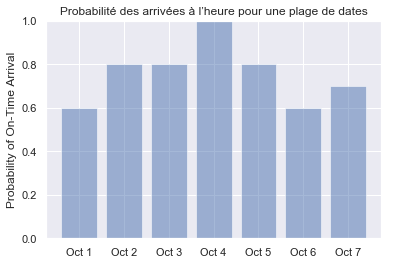

In [106]:
import numpy as np

labels = ('Oct 1', 'Oct 2', 'Oct 3', 'Oct 4', 'Oct 5', 'Oct 6', 'Oct 7')
values = (predict_delay('1/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('2/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('3/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('4/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('5/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('6/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('7/10/2018 21:45:00', 'JFK', 'ATL'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of On-Time Arrival')
plt.title('Probabilité des arrivées à l’heure pour une plage de dates')
plt.ylim((0.0, 1.0))

Modifiez le code afin de produire un graphique similaire pour les vols quittant JFK pour MSP à 13 h 00 du 10 avril au 16 avril. Comment la sortie se distingue-t-elle de la sortie de l’étape précédente ?

(0.0, 1.0)

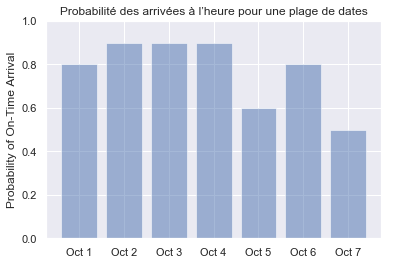

In [107]:
labels = ('Oct 1', 'Oct 2', 'Oct 3', 'Oct 4', 'Oct 5', 'Oct 6', 'Oct 7')
values = (predict_delay('10/04/2018 13:00:00', 'JFK', 'MSP'),
          predict_delay('11/04/2018 13:00:00', 'JFK', 'MSP'),
          predict_delay('12/04/2018 13:00:00', 'JFK', 'MSP'),
          predict_delay('13/04/2018 13:00:00', 'JFK', 'MSP'),
          predict_delay('14/04/2018 13:00:00', 'JFK', 'MSP'),
          predict_delay('15/04/2018 13:00:00', 'JFK', 'MSP'),
          predict_delay('16/04/2018 13:00:00', 'JFK', 'MSP'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of On-Time Arrival')
plt.title('Probabilité des arrivées à l’heure pour une plage de dates')
plt.ylim((0.0, 1.0))

Écrivez vous-même le code pour représenter graphiquement la probabilité que les vols quittant SEA pour ATL à 9 h 00, midi, 15 h 00, 18 h 00 et 21 h 00 le 30 janvier arrivent à l’heure.  

(0.0, 1.0)

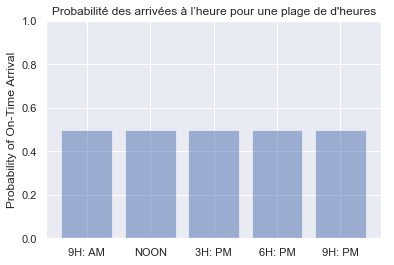

In [114]:
labels = ('9H: AM', 'NOON', '3H: PM', '6H: PM', '9H: PM',)

values = (predict_delay('30/01/2018 21:00:00', 'SEA', 'ATL'),
          predict_delay('30/01/2018 21:00:00', 'SEA', 'ATL'),
          predict_delay('30/01/2018 21:00:00', 'SEA', 'ATL'),
          predict_delay('30/01/2018 21:00:00', 'SEA', 'ATL'),
          predict_delay('30/01/2018 21:00:00', 'SEA', 'ATL'))

alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of On-Time Arrival')
plt.title("Probabilité des arrivées à l’heure pour une plage de d'heures")
plt.ylim((0.0, 1.0))